# Logistic Regression with a Neural Network mindset

## 1 - Packages

In [ ]:
# Importing necessary libraries and packages
import numpy as np
import pandas as pd
import itertools
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2 - Dataset preparation
The goal here is to identify whether a "news" article is fake or fact. 
Dataset ("fake_news_train.csv") which contains the following features:
- id: unique id for a news article
- title: the title of a news article
- author: author of the news article
- text: the text of the article; could be incomplete
- label: a label that marks the article as potentially unreliable
  - 1: unreliable (fake news)
  - 0: reliable (fact news)
  
Dataset ("fake_news_test,csv") is the same as train dataset, but the test dataset does not have "label" feature

In [ ]:
# Loading data as numpy array from csv database files
train = pd.read_csv('fake_news_train.csv')
test = pd.read_csv('fake_news_test.csv')
test = test.set_index('id', drop = True)

In [ ]:
# Counting number of rows and columns in the data
print('Shape of Training Data: ', train.shape)

# Getting a hang of the data in each column and their names
print('\n \n TRAIN \n', train.head())
print('\n \n TEST \n', test.head())

# Looking for any places where training data has NaN values
print('\n \nNumber of Null values in Train Set: ', train['text'].isna().sum())
print('Number of Null values in Test Set: ', test['text'].isna().sum())

# Dropping all rows where text column is NaN
train.dropna(axis=0, how="any", thresh=None, subset=['text'], inplace=True)
test = test.fillna(' ')

Shape of Training Data:  (1001, 5)

 
 TRAIN 
    id  ... label
0   0  ...     1
1   1  ...     0
2   2  ...     1
3   3  ...     1
4   4  ...     1

[5 rows x 5 columns]

 
 TEST 
                                                    title  ...                                               text
id                                                        ...                                                   
20800  Specter of Trump Loosens Tongues, if Not Purse...  ...  PALO ALTO, Calif.  —   After years of scorning...
20801  Russian warships ready to strike terrorists ne...  ...  Russian warships ready to strike terrorists ne...
20802  #NoDAPL: Native American Leaders Vow to Stay A...  ...  Videos #NoDAPL: Native American Leaders Vow to...
20803  Tim Tebow Will Attempt Another Comeback, This ...  ...  If at first you don’t succeed, try a different...
20804                    Keiser Report: Meme Wars (E995)  ...  42 mins ago 1 Views 0 Comments 0 Likes 'For th...

[5 rows x 3 columns]

 
Nu

In [ ]:
# Checking length of each article
length = []
[length.append(len(str(text))) for text in train['text']]
train['length'] = length

print('Minimum Length: ', min(train['length']), '\nMaximum Length: ', max(train['length']), '\nAverage Length: ', round(sum(train['length'])/len(train['length'])))

Minimum Length:  1 
Maximum Length:  92561 
Average Length:  4811


In [ ]:
# Minimum length is 1. We need to spot some outliers and get rid of them. Counting how many outliers are there
print('Number of articles with less than 50 words: ', len(train[train['length'] < 50]))

# Skimming through such short texts just to be sure
print(train['text'][train['length'] < 50])

# Removing outliers, it will reduce overfitting
train = train.drop(train['text'][train['length'] < 50].index, axis = 0)

print('Minimum Length: ', min(train['length']), '\nMaximum Length: ', max(train['length']), '\nAverage Length: ', round(sum(train['length'])/len(train['length'])))

Number of articles with less than 50 words:  14
82                                                
169                                               
173                                Guest   Guest  
196         They got the heater turned up on high.
295                                               
470                                               
485    Support Us Calgary Airport Arrivals YYC \n 
580                                   Ludicrous...
592                                               
786                                              f
871                                               
901                                               
936                                               
950                                               
Name: text, dtype: object
Minimum Length:  54 
Maximum Length:  92561 
Average Length:  4879


In [ ]:
# Secluding labels in a new pandas dataframe for supervised learning
train_labels = train['label']

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train['text'], train_labels, test_size=0.1, random_state=0)

### TF-IDF Vectors as features

In [ ]:
# Setting up Term Frequency - Inverse Document Frequency Vectorizer
tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# Fit and transform training set and transform test set
tfidf_train = tfidf.fit_transform(x_train) 
tfidf_test = tfidf.transform(x_test)
tfidf_test_final = tfidf.transform(test['text'])

In [ ]:
# Setting up Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter = 50)

# Fitting on the training set
pac.fit(tfidf_train, y_train)

# Predicting on the test set
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 90.91%


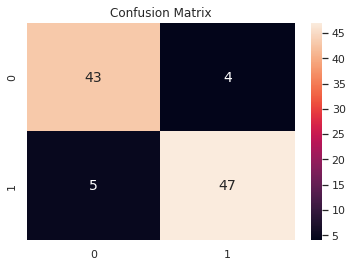


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91        47
           1       0.92      0.90      0.91        52

    accuracy                           0.91        99
   macro avg       0.91      0.91      0.91        99
weighted avg       0.91      0.91      0.91        99



In [ ]:
# Creating confusion matrix with columns as True Positive, False Negative, False Positive and True Negative 
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()

# Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred > 0.5)))